# **Importing Libraries**

In [ ]:
# For Analysis and Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Preprocessing (Encoding, Scaling) & Data Splitting
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

# Machine Learning Models (Training and Tesing)
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.linear_model import LogisticRegression # Logistic_Regression
from sklearn.naive_bayes import GaussianNB # Naive_Bayes
from sklearn.tree import DecisionTreeClassifier # Decision_Tree
from sklearn.ensemble import RandomForestClassifier # Random_Forest

# Machine Leaning Models (Evaluating)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score

# For Handling Imbalance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Ignore the Warning Messages
import warnings
warnings.filterwarnings('ignore')

# **Data Loading & Visualization**

In [ ]:
# Read Dataset from a Google Drive File
dataset_link = "https://drive.google.com/file/d/1_RR3frkiYkSoRaw7GFpaWCmNeem2_TBT/view?usp=sharing"

# Get the ID part of the file
id = dataset_link.split("/")[-2]

# Create a new_link using the ID to read the CSV file in Pandas
new_link = f"https://drive.google.com/uc?id={id}"
print(new_link)
data = pd.read_csv(new_link)

https://drive.google.com/uc?id=1_RR3frkiYkSoRaw7GFpaWCmNeem2_TBT


In [ ]:
data.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15


In [ ]:
data.tail()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
23629,d8b7171f-bdd9-479c-b98b-396c621aebfe,98a3d94c-dc9a-4525-b273-e6ffe54cc5a4,53.73,2024-01-26 16:25:05,PayPal,toys & games,5,32,Rebeccafurt,tablet,173.97.197.128,USNV Clayton\nFPO AE 82639,USNV Clayton\nFPO AE 82639,0,363,16
23630,0fd12cf3-c641-4499-8de1-15dc4555cb0c,b3429f52-8b27-46b5-914c-4accd989edb4,47.42,2024-02-25 17:03:26,credit card,clothing,4,41,Nataliefort,desktop,133.222.22.48,"9288 Patricia Cape Apt. 527\nMelissaton, IL 38543","9288 Patricia Cape Apt. 527\nMelissaton, IL 38543",0,296,17
23631,649680d3-a684-44cb-95bf-9b454c3aa86d,066e25c9-4420-4224-bc3f-1a462708090e,1045.23,2024-03-28 23:46:47,bank transfer,health & beauty,1,9,East Shannonville,tablet,206.133.237.168,3015 Elizabeth Summit Suite 819\nEast Joelfort...,3015 Elizabeth Summit Suite 819\nEast Joelfort...,0,329,23
23632,c10dbb08-28fc-4ec1-9850-d4e98d2b9640,cde96e9c-f562-4b8c-8fa8-f356f474232b,34.25,2024-02-09 11:29:18,debit card,home & garden,2,39,Lake Nicole,mobile,16.204.137.130,"531 Brittany Pike\nNew Stacy, OR 87952","531 Brittany Pike\nNew Stacy, OR 87952",0,347,11
23633,23e3c107-f2fc-48c2-abbc-7b809bf6f102,d8d7a64e-8419-4421-910a-a7cf709a900b,85.03,2024-01-23 02:46:52,credit card,clothing,4,38,Holtport,tablet,116.188.254.162,"289 Adams Wells\nWest Joeltown, LA 69190","289 Adams Wells\nWest Joeltown, LA 69190",0,203,2


In [ ]:
data.shape

(23634, 16)

In [ ]:
print("Number of rows :", data.shape[0])
print("Number of columns :", data.shape[1])

Number of rows : 23634
Number of columns : 16


In [ ]:
data.columns

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date', 'Payment Method', 'Product Category', 'Quantity',
       'Customer Age', 'Customer Location', 'Device Used', 'IP Address',
       'Shipping Address', 'Billing Address', 'Is Fraudulent',
       'Account Age Days', 'Transaction Hour'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      23634 non-null  object 
 1   Customer ID         23634 non-null  object 
 2   Transaction Amount  23634 non-null  float64
 3   Transaction Date    23634 non-null  object 
 4   Payment Method      23634 non-null  object 
 5   Product Category    23634 non-null  object 
 6   Quantity            23634 non-null  int64  
 7   Customer Age        23634 non-null  int64  
 8   Customer Location   23634 non-null  object 
 9   Device Used         23634 non-null  object 
 10  IP Address          23634 non-null  object 
 11  Shipping Address    23634 non-null  object 
 12  Billing Address     23634 non-null  object 
 13  Is Fraudulent       23634 non-null  int64  
 14  Account Age Days    23634 non-null  int64  
 15  Transaction Hour    23634 non-null  int64  
dtypes: f

In [ ]:
data.describe(include="all")

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
count,23634,23634,23634.000000,23634,23634,23634,23634.000000,23634.000000,23634,23634,23634,23634,23634,23634.000000,23634.000000,23634.000000
unique,23634,23634,NaN,23607,4,5,NaN,NaN,14868,3,23634,23634,23634,NaN,NaN,NaN
top,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,NaN,2024-02-22 20:18:45,debit card,home & garden,NaN,NaN,North Michael,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,NaN,NaN,NaN
freq,1,1,NaN,2,5952,4786,NaN,NaN,30,7923,1,1,1,NaN,NaN,NaN
mean,NaN,NaN,229.367099,NaN,NaN,NaN,3.000550,34.560210,NaN,NaN,NaN,NaN,NaN,0.051705,178.660531,11.266015
std,NaN,NaN,282.046669,NaN,NaN,NaN,1.419663,10.009471,NaN,NaN,NaN,NaN,NaN,0.221436,107.388682,6.980659
min,NaN,NaN,10.000000,NaN,NaN,NaN,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000
25%,NaN,NaN,69.070000,NaN,NaN,NaN,2.000000,28.000000,NaN,NaN,NaN,NaN,NaN,0.000000,84.000000,5.000000
50%,NaN,NaN,151.415000,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN,0.000000,178.000000,11.000000
75%,NaN,NaN,296.127500,NaN,NaN,NaN,4.000000,41.000000,NaN,NaN,NaN,NaN,NaN,0.000000,272.000000,17.000000


In [ ]:
data.isnull().sum()

,0
Transaction ID,0
Customer ID,0
Transaction Amount,0
Transaction Date,0
Payment Method,0
Product Category,0
Quantity,0
Customer Age,0
Customer Location,0
Device Used,0


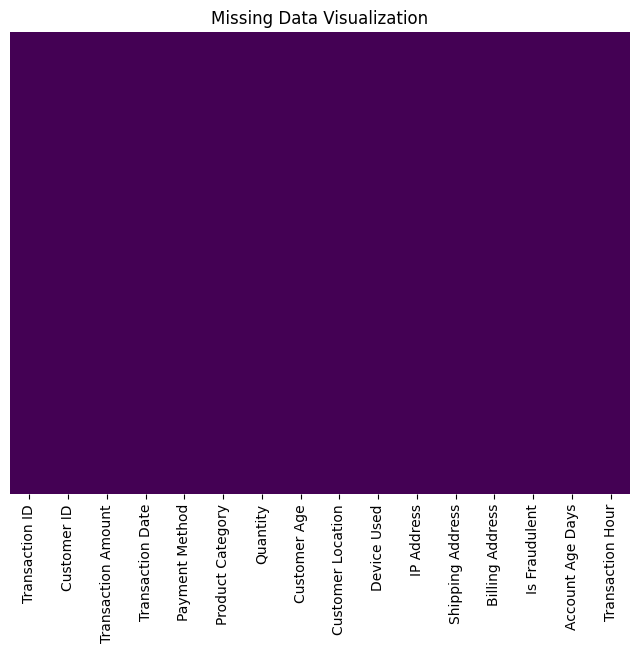

In [ ]:
# Plotting missing values

missing_values = data.isnull().sum()
plt.figure(figsize=(8, 6))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data Visualization')
plt.show()

In [ ]:
print("Number of duplicate rows in the dataset:", data.duplicated().sum())

Number of duplicate rows in the dataset: 0


In [ ]:
data.nunique()

,0
Transaction ID,23634
Customer ID,23634
Transaction Amount,18375
Transaction Date,23607
Payment Method,4
Product Category,5
Quantity,5
Customer Age,74
Customer Location,14868
Device Used,3


# **Feature Analysis**

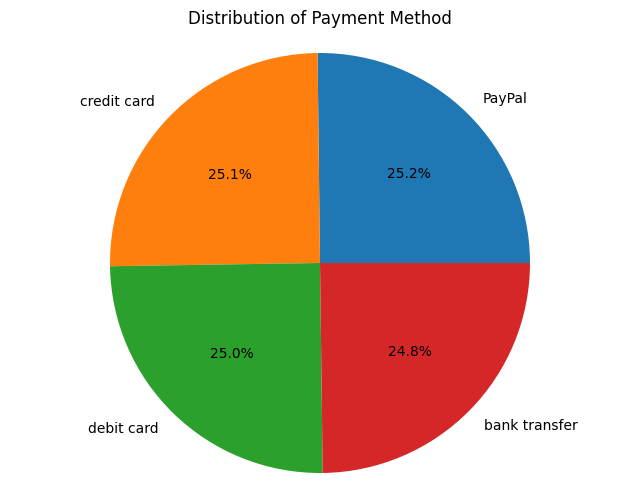

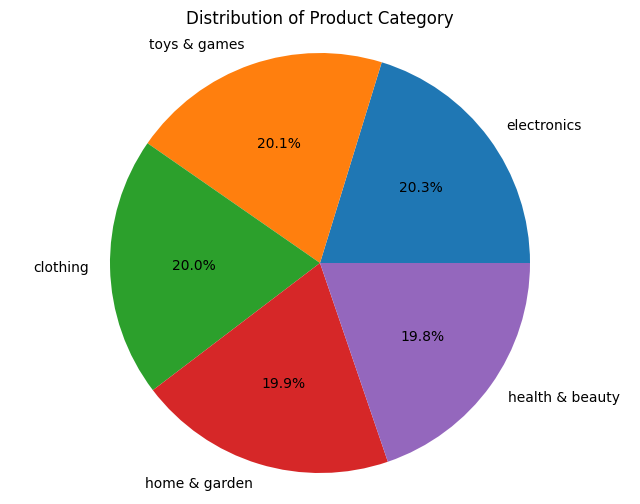

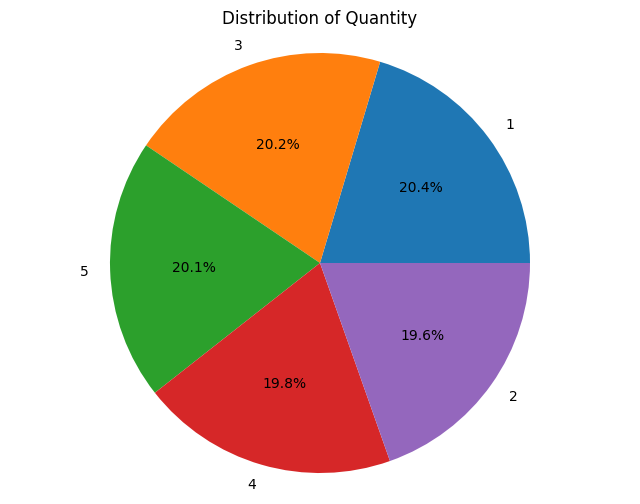

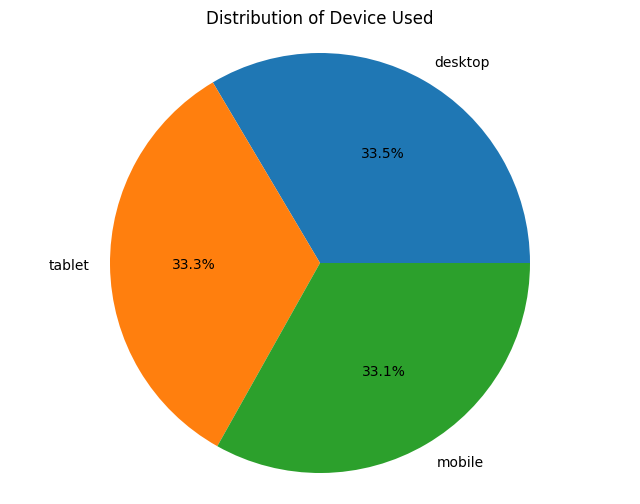

In [ ]:
categorical_features = ['Payment Method', 'Product Category', 'Quantity', 'Device Used']

for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    plt.pie(data[feature].value_counts(), labels=data[feature].unique(), autopct='%1.1f%%')
    plt.title(f'Distribution of {feature}')
    plt.axis('equal')
    plt.show()

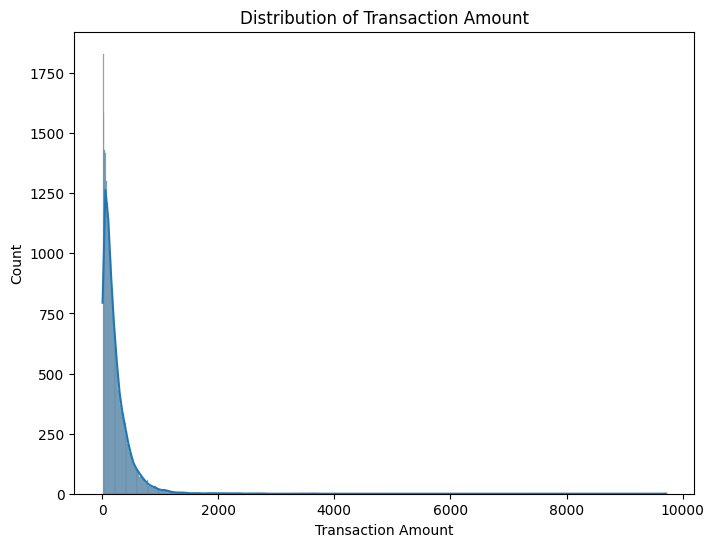

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Transaction Amount'], kde=True)
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.title('Distribution of Transaction Amount')
plt.show()

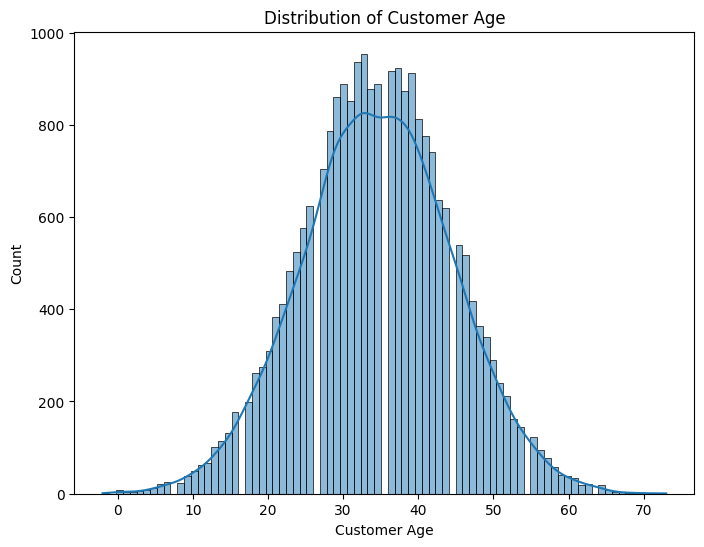

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Customer Age'], kde=True)
plt.xlabel('Customer Age')
plt.ylabel('Count')
plt.title('Distribution of Customer Age')
plt.show()

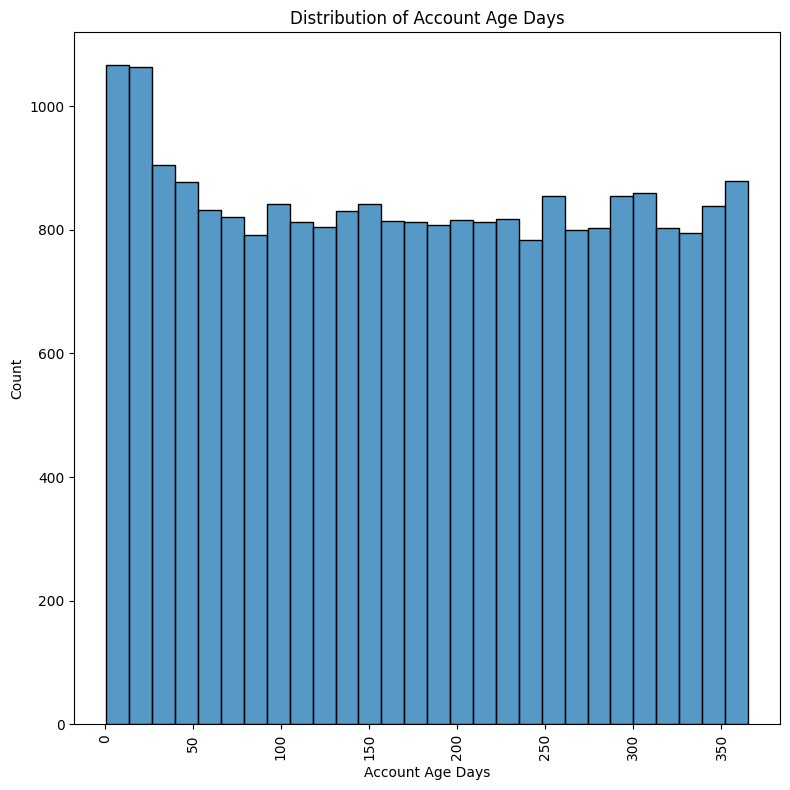

In [ ]:
plt.figure(figsize=(8, 8))
sns.histplot(x='Account Age Days', data=data)
plt.xlabel('Account Age Days')
plt.ylabel('Count')
plt.title('Distribution of Account Age Days')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

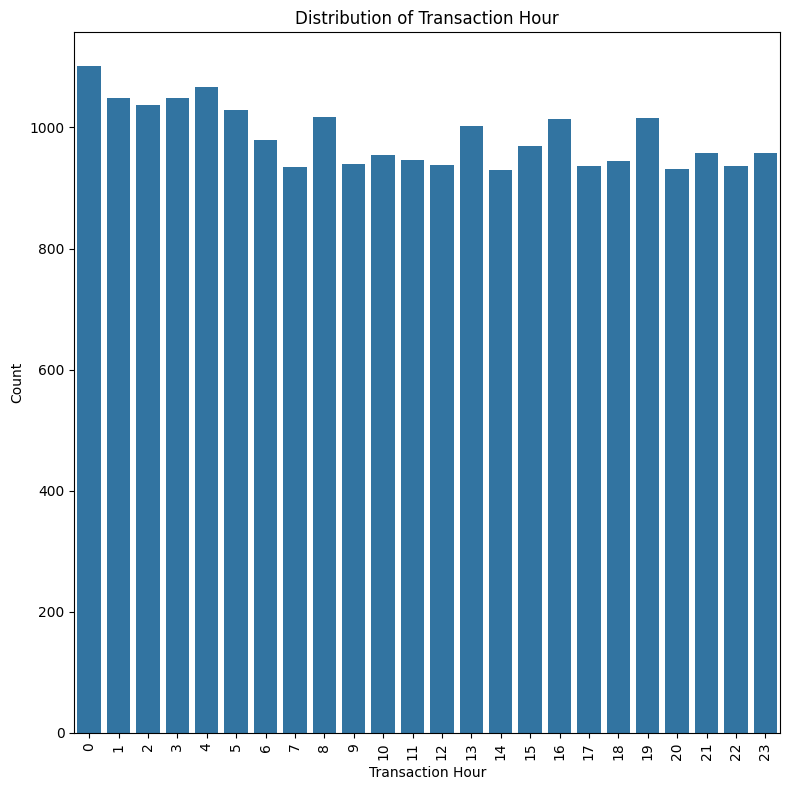

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Transaction Hour', data=data)
plt.xlabel('Transaction Hour')
plt.ylabel('Count')
plt.title('Distribution of Transaction Hour')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

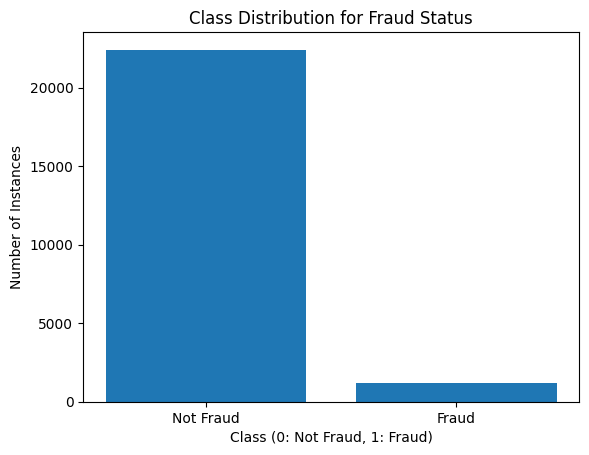

In [ ]:
# Bar Chart for Fraud Class Distribution

fraud_counts = data['Is Fraudulent'].value_counts()

plt.bar(['Not Fraud', 'Fraud'], fraud_counts)
plt.title('Class Distribution for Fraud Status')
plt.xlabel('Class (0: Not Fraud, 1: Fraud)')
plt.ylabel('Number of Instances')
plt.show()

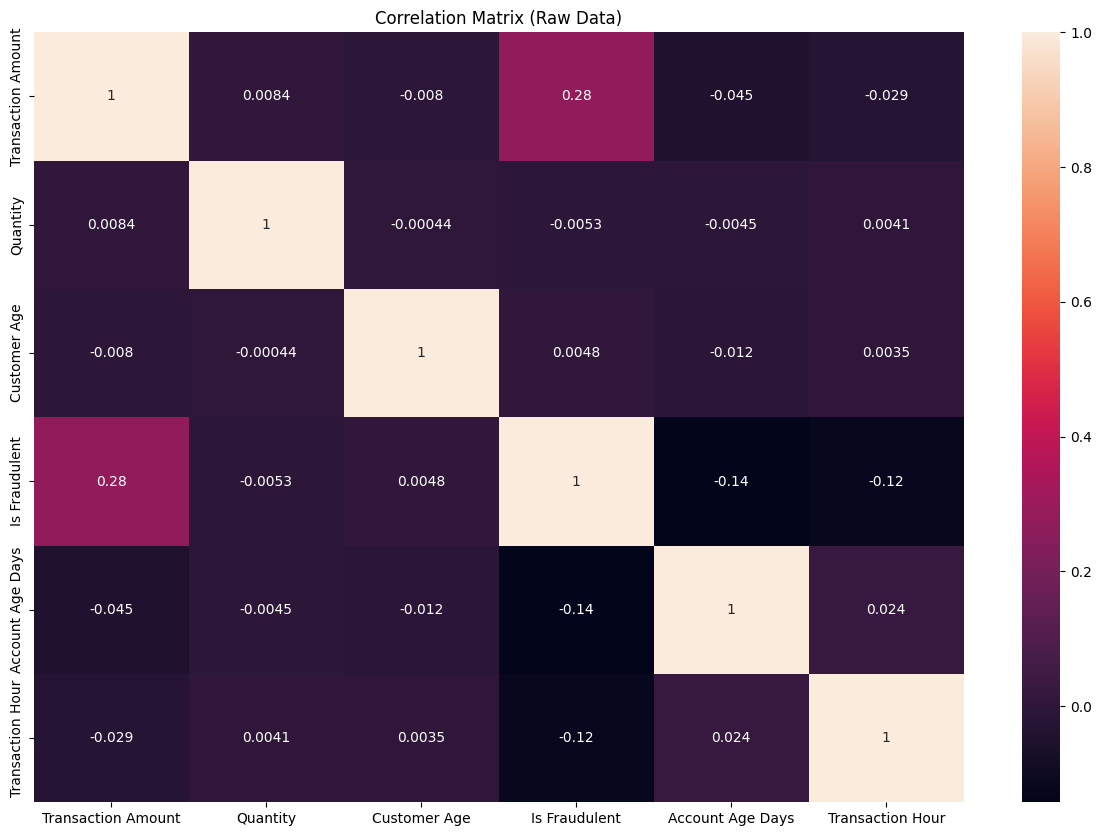

In [ ]:
numeric_data = data.select_dtypes(include=np.number) # Select numeric columns (only) for correlation calculation
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_data.corr(), annot=True)
plt.title('Correlation Matrix (Raw Data)')
plt.show()

# **Data Preprocessing**

In [ ]:
# Check if Shipping Address and Billing Address are same (1) or not (0)

data['Address Match'] = (data['Shipping Address'] == data['Billing Address']).astype(int)

In [ ]:
# Remove irrelevant features and downcast the datatype to reduce dataset size

data = data.drop(["Transaction ID", "Customer ID", "Customer Location", "Transaction Date", "IP Address", "Shipping Address", "Billing Address"], axis=1)

In [ ]:
# Dealing with Categorical Data

categorical = data.select_dtypes(include=['object']).columns.tolist()
categorical

['Payment Method', 'Product Category', 'Device Used']

In [ ]:
# Apply one-hot encoding to the columns with categorical data
data = pd.get_dummies(data, columns=['Payment Method', 'Product Category', 'Device Used'], drop_first=False)
data

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour,Address Match,Payment Method_PayPal,Payment Method_bank transfer,Payment Method_credit card,Payment Method_debit card,Product Category_clothing,Product Category_electronics,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_desktop,Device Used_mobile,Device Used_tablet
0,42.32,1,40,0,282,23,1,True,False,False,False,False,True,False,False,False,True,False,False
1,301.34,3,35,0,223,0,1,False,False,True,False,False,True,False,False,False,False,False,True
2,340.32,5,29,0,360,8,0,False,False,False,True,False,False,False,False,True,True,False,False
3,95.77,5,45,0,325,20,1,False,False,True,False,False,True,False,False,False,False,True,False
4,77.45,5,42,0,116,15,1,False,False,True,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23629,53.73,5,32,0,363,16,1,True,False,False,False,False,False,False,False,True,False,False,True
23630,47.42,4,41,0,296,17,1,False,False,True,False,True,False,False,False,False,True,False,False
23631,1045.23,1,9,0,329,23,1,False,True,False,False,False,False,True,False,False,False,False,True
23632,34.25,2,39,0,347,11,1,False,False,False,True,False,False,False,True,False,False,True,False


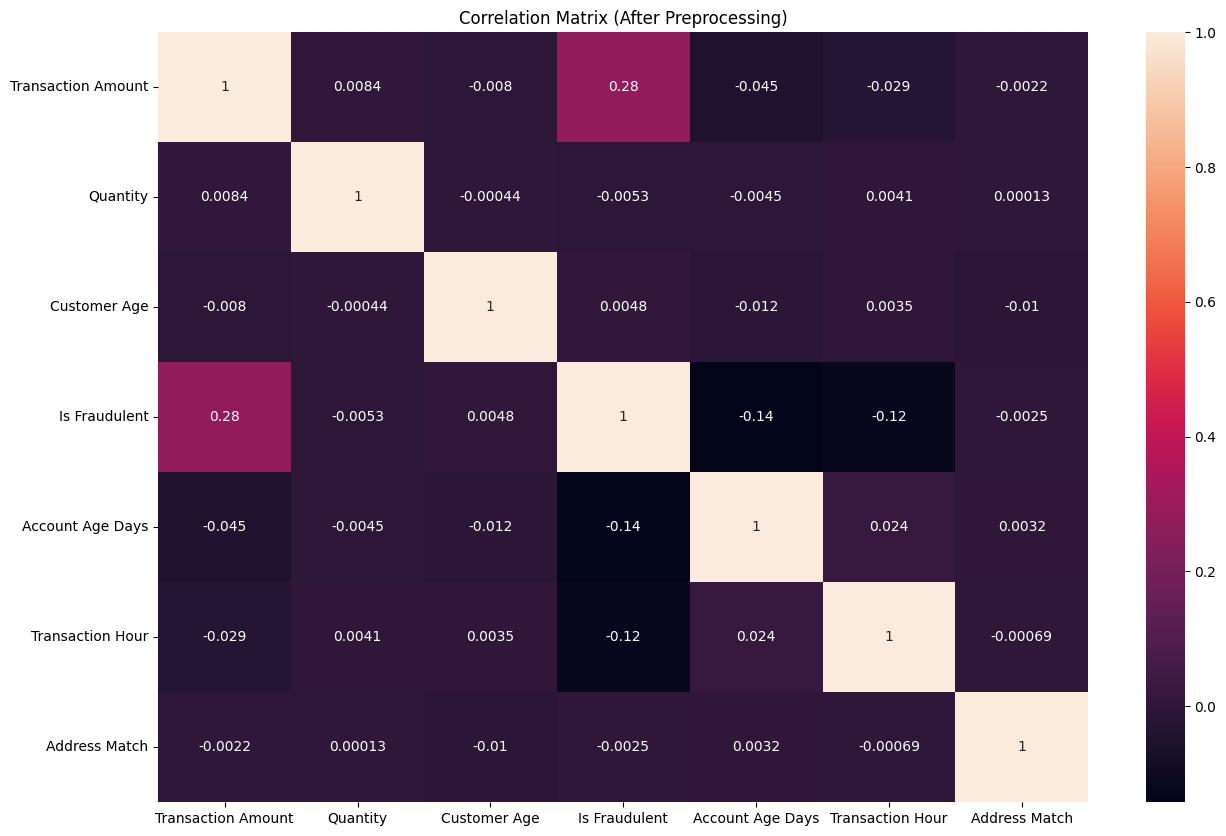

In [ ]:
numeric_data = data.select_dtypes(include=np.number) # Select numeric columns (only) for correlation calculation
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_data.corr(), annot=True)
plt.title('Correlation Matrix (After Preprocessing)')
plt.show()

# **Feature Scaling**

In [ ]:
# Initialize Scalers
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

# Applying appropriate Scalers
data['Customer Age'] = minmax_scaler.fit_transform(data[['Customer Age']])
data['Account Age Days'] = standard_scaler.fit_transform(data[['Account Age Days']])
data['Transaction Amount'] = robust_scaler.fit_transform(data[['Transaction Amount']])

# Display the first few rows of the scaled dataset
data.head()

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour,Address Match,Payment Method_PayPal,Payment Method_bank transfer,Payment Method_credit card,Payment Method_debit card,Product Category_clothing,Product Category_electronics,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_desktop,Device Used_mobile,Device Used_tablet
0,-0.480473,1,0.560000,0,0.962314,23,1,True,False,False,False,False,True,False,False,False,True,False,False
1,0.660295,3,0.493333,0,0.412896,0,1,False,False,True,False,False,True,False,False,False,False,False,True
2,0.831970,5,0.413333,0,1.688663,8,0,False,False,False,True,False,False,False,False,True,True,False,False
3,-0.245070,5,0.626667,0,1.362737,20,1,False,False,True,False,False,True,False,False,False,False,True,False
4,-0.325754,5,0.586667,0,-0.583505,15,1,False,False,True,False,True,False,False,False,False,True,False,False


# **Dataset Splitting**

In [ ]:
# Set Label = "Is Fraudulent"

X = data.drop("Is Fraudulent", axis=1)
y = data["Is Fraudulent"]
X.shape, y.shape

((23634, 18), (23634,))

In [ ]:
# Split the data into 70-30 train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [ ]:
# Display the Shapes

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (16543, 18)
X_test shape: (7091, 18)
y_train shape: (16543,)
y_test shape: (7091,)


# **Model Training & Testing**

In [ ]:
# Function to Evaluate the Model

def evaluate_model(y_test, y_pred, model_name):
    print(f"Evaluation Metrics for {model_name}:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

Evaluation Metrics for KNN:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      6724
           1       0.59      0.11      0.19       367

    accuracy                           0.95      7091
   macro avg       0.77      0.56      0.58      7091
weighted avg       0.93      0.95      0.93      7091



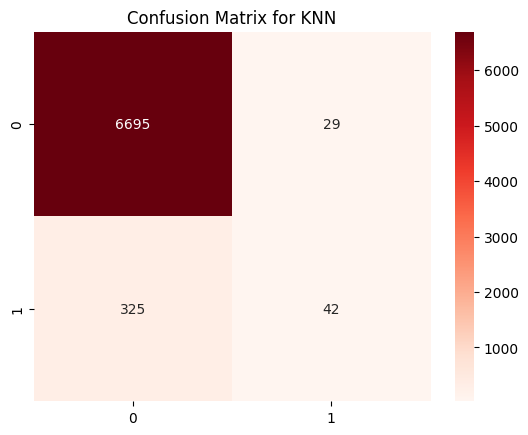

In [ ]:
# KNN

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, knn_pred)
evaluate_model(y_test, knn_pred, "KNN")

Evaluation Metrics for Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      6724
           1       0.85      0.12      0.21       367

    accuracy                           0.95      7091
   macro avg       0.90      0.56      0.60      7091
weighted avg       0.95      0.95      0.94      7091



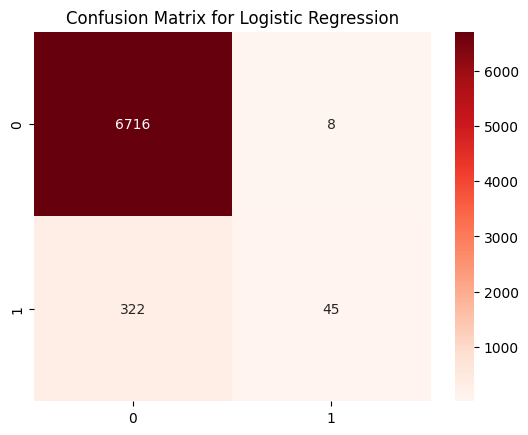

In [ ]:
# Logistic_Regression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, log_reg_pred)
evaluate_model(y_test, log_reg_pred, "Logistic Regression")

Evaluation Metrics for Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6724
           1       0.38      0.22      0.28       367

    accuracy                           0.94      7091
   macro avg       0.67      0.60      0.63      7091
weighted avg       0.93      0.94      0.93      7091



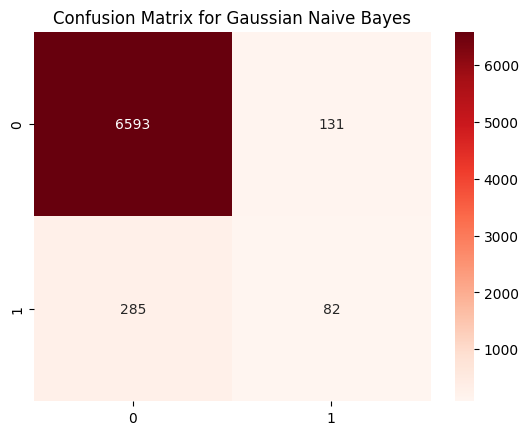

In [ ]:
# Gaussian_Naive_Bayes

gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, gnb_pred)
evaluate_model(y_test, gnb_pred, "Gaussian Naive Bayes")

Evaluation Metrics for Decision Tree:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      6724
           1       0.22      0.29      0.25       367

    accuracy                           0.91      7091
   macro avg       0.59      0.62      0.60      7091
weighted avg       0.92      0.91      0.92      7091



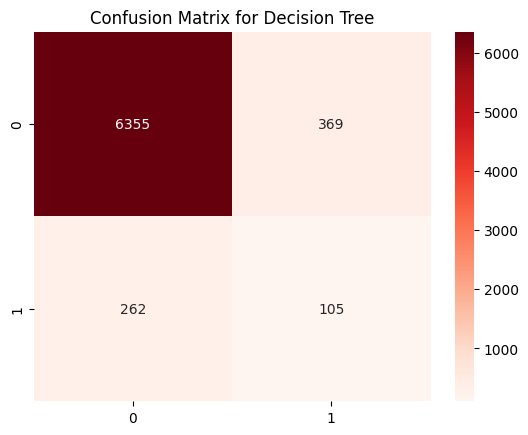

In [ ]:
# Decision_Tree

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, dt_pred)
evaluate_model(y_test, dt_pred, "Decision Tree")

Evaluation Metrics for Random Forest:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6724
           1       0.79      0.14      0.24       367

    accuracy                           0.95      7091
   macro avg       0.87      0.57      0.61      7091
weighted avg       0.95      0.95      0.94      7091



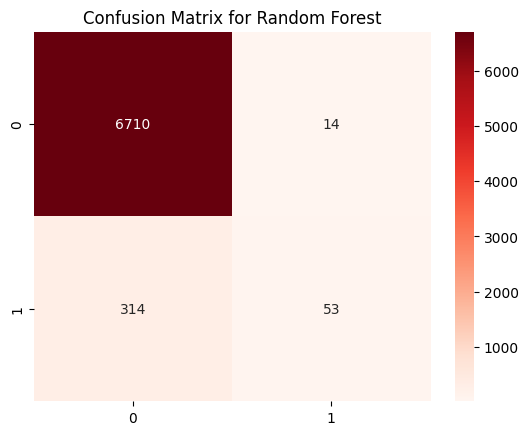

In [ ]:
# Random_Forrest

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_pred)
evaluate_model(y_test, rf_pred, "Random Forest")

# **Handling Imbalance**

## **Random Under Sampler**

In [ ]:
rus = RandomUnderSampler(sampling_strategy='majority')
X_undersampled, y_undersampled = rus.fit_resample(X, y)
print(X_undersampled.shape,y_undersampled.shape)

(2444, 18) (2444,)


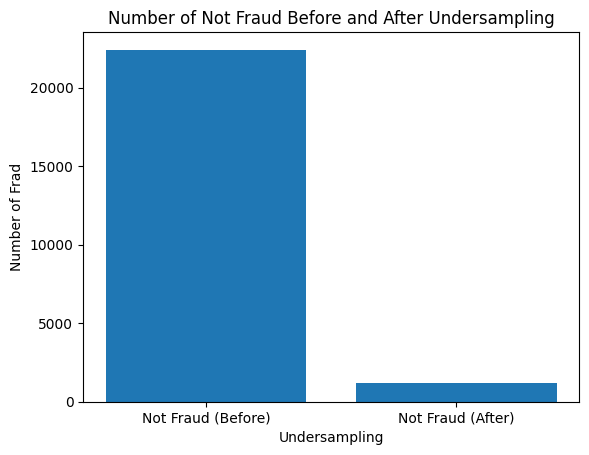

In [ ]:
isNotFraud_before = y.count() - y.sum()
isNotFraud_after = y_undersampled.sum()

plt.bar(['Not Fraud (Before)', 'Not Fraud (After)'], [isNotFraud_before, isNotFraud_after])
plt.title('Number of Not Fraud Before and After Undersampling')
plt.xlabel('Undersampling')
plt.ylabel('Number of Frad')
plt.show()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_undersampled, y_undersampled, test_size = 0.3, random_state=42)

Evaluation Metrics for KNN:
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       377
           1       0.67      0.65      0.66       357

    accuracy                           0.68       734
   macro avg       0.68      0.68      0.68       734
weighted avg       0.68      0.68      0.68       734



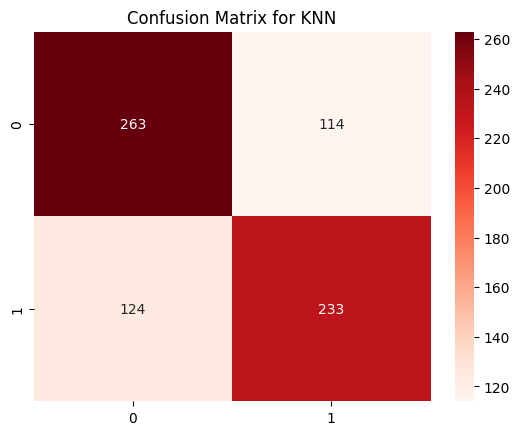

In [ ]:
# KNN

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, knn_pred)
evaluate_model(y_test, knn_pred, "KNN")

Evaluation Metrics for Logistic Regression:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       377
           1       0.69      0.69      0.69       357

    accuracy                           0.70       734
   macro avg       0.70      0.70      0.70       734
weighted avg       0.70      0.70      0.70       734



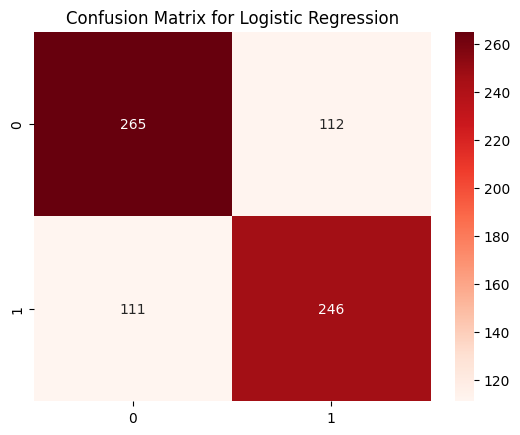

In [ ]:
# Logistic_Regression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, log_reg_pred)
evaluate_model(y_test, log_reg_pred, "Logistic Regression")

Evaluation Metrics for Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.61      0.89      0.72       377
           1       0.77      0.39      0.52       357

    accuracy                           0.65       734
   macro avg       0.69      0.64      0.62       734
weighted avg       0.68      0.65      0.62       734



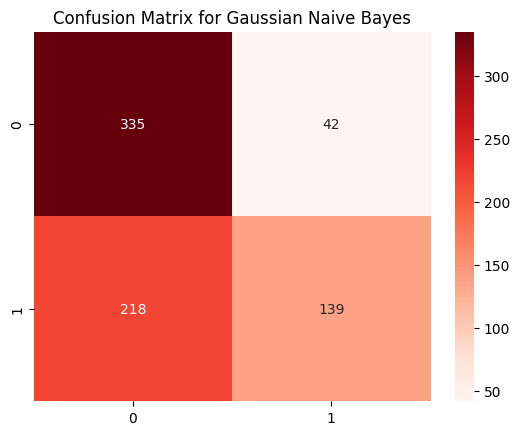

In [ ]:
# Gaussian_Naive_Bayes

gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, gnb_pred)
evaluate_model(y_test, gnb_pred, "Gaussian Naive Bayes")

Evaluation Metrics for Decision Tree:
              precision    recall  f1-score   support

           0       0.65      0.60      0.63       377
           1       0.61      0.66      0.64       357

    accuracy                           0.63       734
   macro avg       0.63      0.63      0.63       734
weighted avg       0.63      0.63      0.63       734



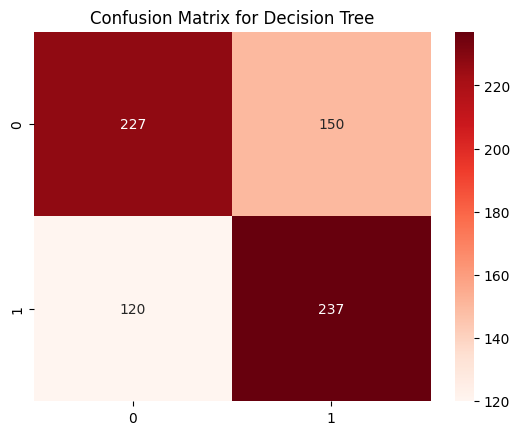

In [ ]:
# Decision_Tree

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, dt_pred)
evaluate_model(y_test, dt_pred, "Decision Tree")

Evaluation Metrics for Random Forest:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       377
           1       0.71      0.71      0.71       357

    accuracy                           0.72       734
   macro avg       0.72      0.72      0.72       734
weighted avg       0.72      0.72      0.72       734



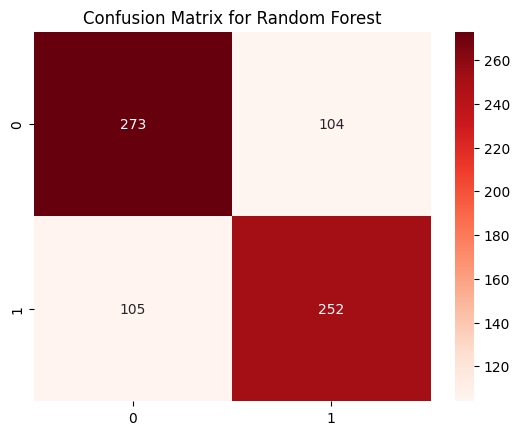

In [ ]:
# Random_Forrest

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_pred)
evaluate_model(y_test, rf_pred, "Random Forest")

## **SMOTE**

In [ ]:
smote = SMOTE()
X_oversampled, y_oversampled = smote.fit_resample(X, y)
print(X_oversampled.shape,y_oversampled.shape)

(44824, 18) (44824,)


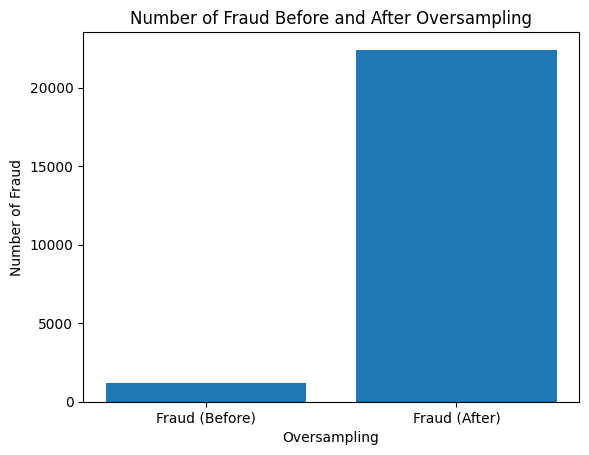

In [ ]:
isFraud_before = y.sum()
isFraud_after = y_oversampled.sum()

plt.bar(['Fraud (Before)', 'Fraud (After)'], [isFraud_before, isFraud_after])
plt.title('Number of Fraud Before and After Oversampling')
plt.xlabel('Oversampling')
plt.ylabel('Number of Fraud')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size = 0.3, random_state = 42)

Evaluation Metrics for KNN:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      6779
           1       0.90      0.98      0.94      6669

    accuracy                           0.94     13448
   macro avg       0.94      0.94      0.94     13448
weighted avg       0.94      0.94      0.94     13448



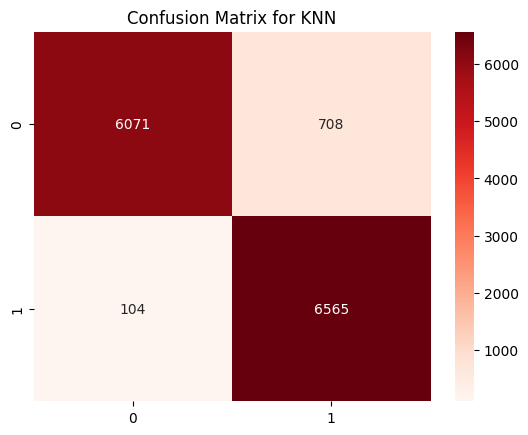

In [ ]:
# KNN

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, knn_pred)
evaluate_model(y_test, knn_pred, "KNN")

Evaluation Metrics for Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      6779
           1       0.97      0.87      0.92      6669

    accuracy                           0.92     13448
   macro avg       0.93      0.92      0.92     13448
weighted avg       0.93      0.92      0.92     13448



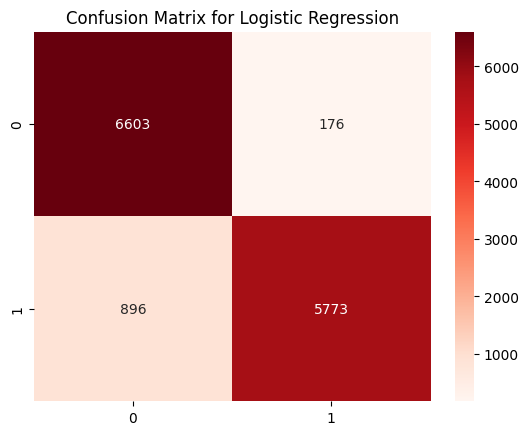

In [ ]:
# Logistic_Regression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, log_reg_pred)
evaluate_model(y_test, log_reg_pred, "Logistic Regression")

Evaluation Metrics for Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.67      0.92      0.78      6779
           1       0.87      0.55      0.67      6669

    accuracy                           0.73     13448
   macro avg       0.77      0.73      0.72     13448
weighted avg       0.77      0.73      0.72     13448



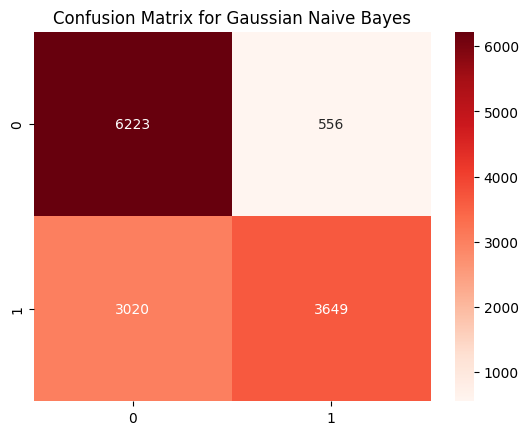

In [ ]:
# Gaussian_Naive_Bayes

gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, gnb_pred)
evaluate_model(y_test, gnb_pred, "Gaussian Naive Bayes")

Evaluation Metrics for Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      6779
           1       0.90      0.93      0.92      6669

    accuracy                           0.92     13448
   macro avg       0.92      0.92      0.92     13448
weighted avg       0.92      0.92      0.92     13448



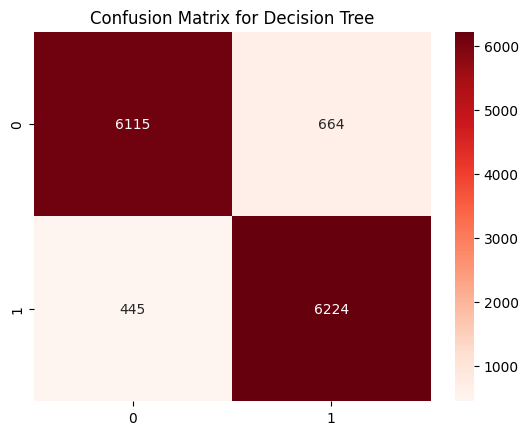

In [ ]:
# Decision_Tree

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, dt_pred)
evaluate_model(y_test, dt_pred, "Decision Tree")

Evaluation Metrics for Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      6779
           1       0.97      0.97      0.97      6669

    accuracy                           0.97     13448
   macro avg       0.97      0.97      0.97     13448
weighted avg       0.97      0.97      0.97     13448



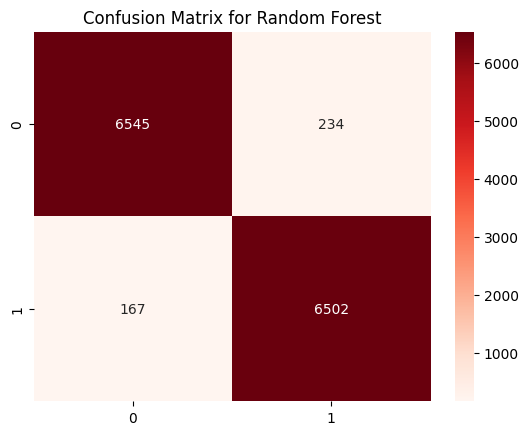

In [ ]:
# Random_Forrest

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_pred)
evaluate_model(y_test, rf_pred, "Random Forest")

# **Model Selection/Comparison Analysis**

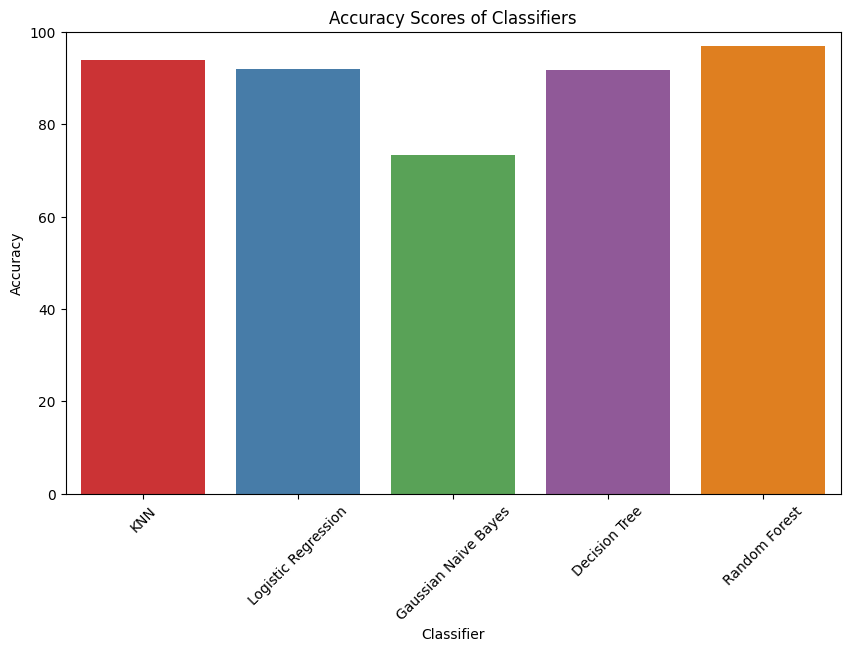

In [ ]:
# List of Classifier Names and their Corresponding Accuracy Scores
classifier_names = ['KNN', 'Logistic Regression', 'Gaussian Naive Bayes',  'Decision Tree', 'Random Forest']
accuracy_scores =[i*100 for i in [accuracy_knn, accuracy_log_reg, accuracy_gnb, accuracy_dt, accuracy_rf]]  # Example accuracy scores

# Create a DataFrame to store classifier names and accuracy scores
accuracy_df = pd.DataFrame({'Classifier': classifier_names, 'Accuracy': accuracy_scores})

# Plot Accuracy scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Classifier', y='Accuracy', data=accuracy_df, palette='Set1')
plt.title('Accuracy Scores of Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.show()

In [ ]:
def visualize_classification_report(model_name, truth, prediction):
    # Get the classification report as a dictionary
    report = classification_report(truth, prediction, output_dict=True)

    # Extract precision, recall, and F1-score for classes 0 and 1
    metrics = ['precision', 'recall', 'f1-score']
    classes = ['0', '1']
    data = {
        'Metric': [],
        'Class': [],
        'Score': []
    }

    for metric in metrics:
        for cls in classes:
            data['Metric'].append(metric)
            data['Class'].append(f'Class {cls}')
            data['Score'].append(report[cls][metric])

    # Convert to a DataFrame
    comparison_df = pd.DataFrame(data)

    plt.figure(figsize=(8, 6))
    sns.barplot(x='Metric', y='Score', hue='Class', data=comparison_df, palette='ocean')
    plt.title(f'Precision, Recall, and F1-Score for {model_name}')
    plt.xlabel('Metric')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.legend(title='Class')
    plt.show()

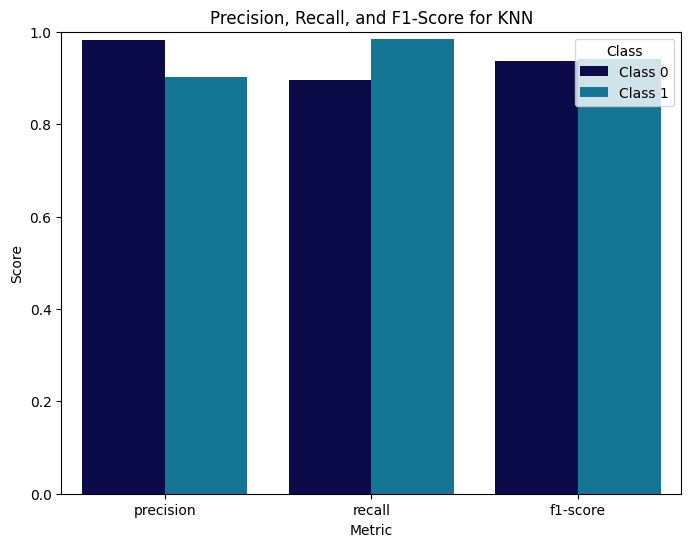

In [ ]:
visualize_classification_report("KNN", y_test, knn_pred)

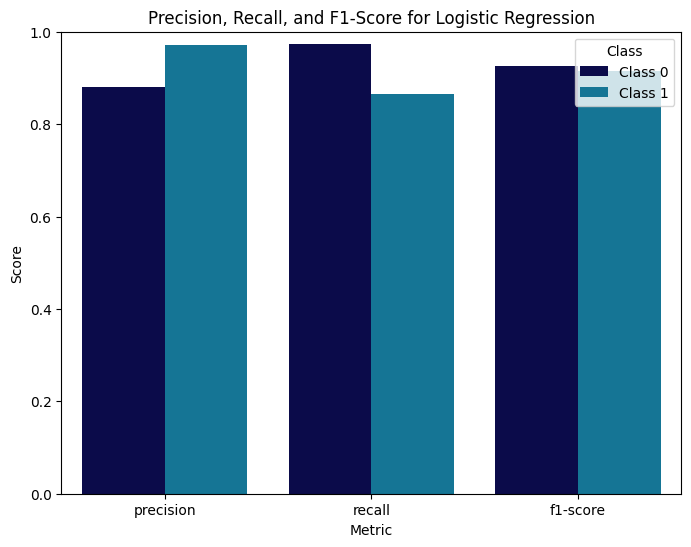

In [ ]:
visualize_classification_report("Logistic Regression", y_test, log_reg_pred)

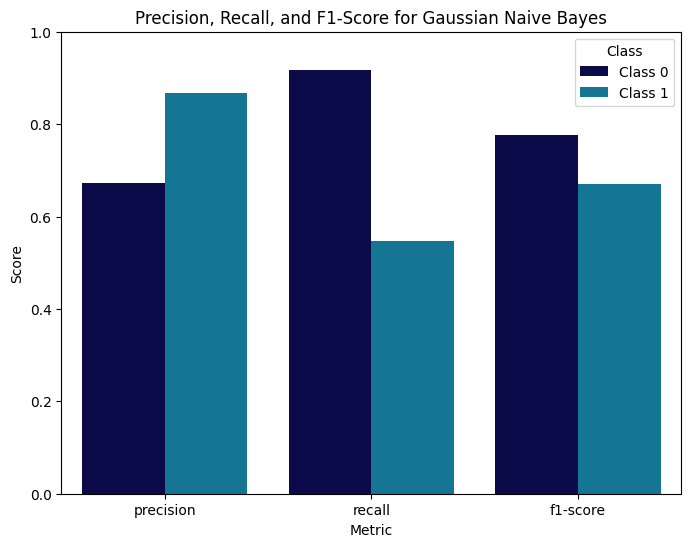

In [ ]:
visualize_classification_report("Gaussian Naive Bayes", y_test, gnb_pred)

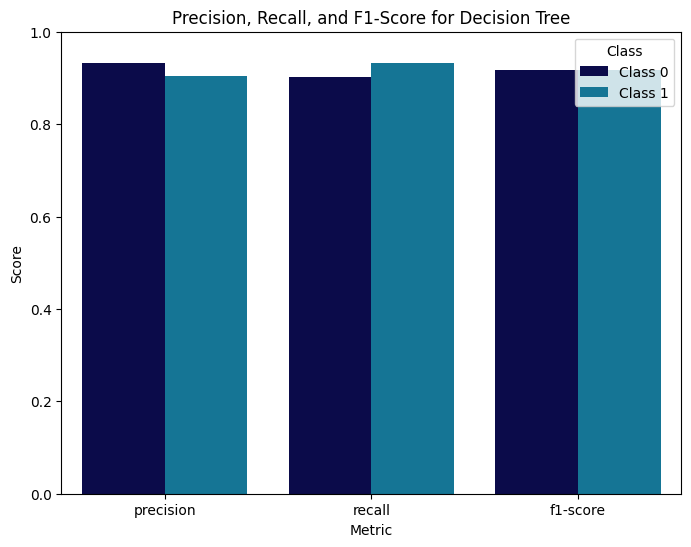

In [ ]:
visualize_classification_report("Decision Tree", y_test, dt_pred)

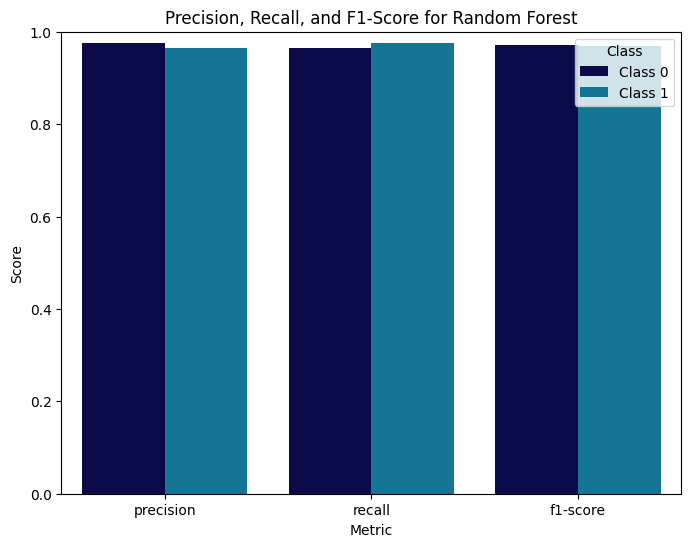

In [ ]:
visualize_classification_report("Random Forest", y_test, rf_pred)